In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [5]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\Programming\\amazon\\amz_uk_price_prediction_dataset.csv")

In [9]:
#Create a crosstab between the product category and the isBestSeller status.
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [14]:
#Are there categories where being a best-seller is more prevalent?
crosstab['BestSeller_Proportion'] = crosstab[True] / (crosstab[True] + crosstab[False])
sorted_crosstab = crosstab.sort_values(by='BestSeller_Proportion', ascending=False)
sorted_crosstab

isBestSeller,False,True,BestSeller_Proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [15]:
#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
from scipy.stats import chi2_contingency
#chi2_contingency is a function

# Chi-square test for 'category' and 'isBestSeller'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)

chi2_statistic, chi2_p_value

(36684.23786636857, 0.0)

In [18]:
#Compute Cramér's V to understand the strength of association between best-seller status and category.
from scipy.stats.contingency import association

cramer_v=association(crosstab, method="cramer")
cramer_v

ValueError: `observed` must be an integer array.

In [19]:
print(crosstab.dtypes)

isBestSeller
False                      int64
True                       int64
BestSeller_Proportion    float64
dtype: object


In [20]:
crosstab_counts = crosstab.drop(columns=['BestSeller_Proportion'])

In [21]:
#Compute Cramér's V to understand the strength of association between best-seller status and category.
from scipy.stats.contingency import association

cramer_v=association(crosstab_counts, method="cramer")
cramer_v

0.1222829439760564

<Axes: xlabel='category'>

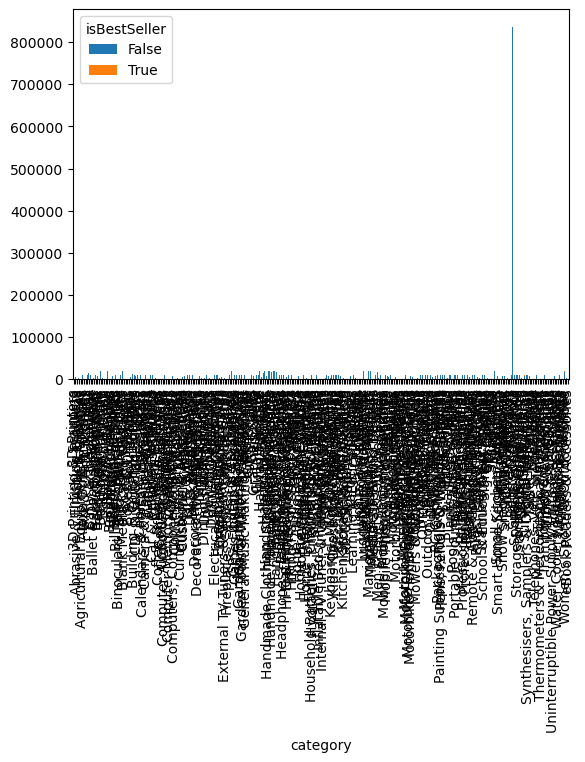

In [22]:
crosstab_counts.plot(kind="bar", stacked=True)

In [27]:
#Remove outliers in product prices.

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

df.shape


(2443651, 9)

In [28]:
df_no_outliers.shape

(2115963, 9)

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

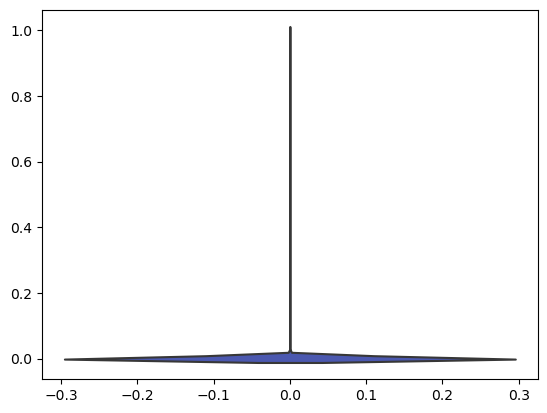

In [29]:
#Violin plot
sns.violinplot(data=df, x='category', y='isBestSeller', palette="coolwarm")

<Axes: xlabel='category', ylabel='price'>

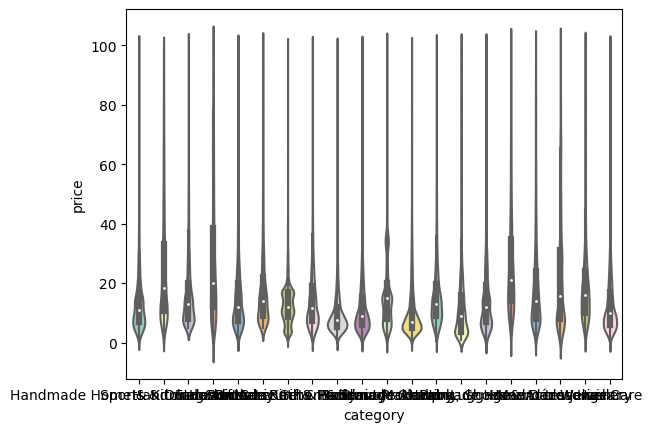

In [32]:
#violin plot
category_counts = df_no_outliers['category'].value_counts()

top_20 = category_counts.nlargest(20).index

filtered_df = df_no_outliers[df_no_outliers['category'].isin(top_20)]

sns.violinplot(x='category', y='price', data=filtered_df, palette="Set3")

In [33]:
median_prices = df_no_outliers.groupby('category')['price'].median()

# Step 2: Identify the category with the highest median price
highest_median_category = median_prices.idxmax()
highest_median_price = median_prices.max()
highest_median_category

'Desktop PCs'

<Axes: xlabel='category'>

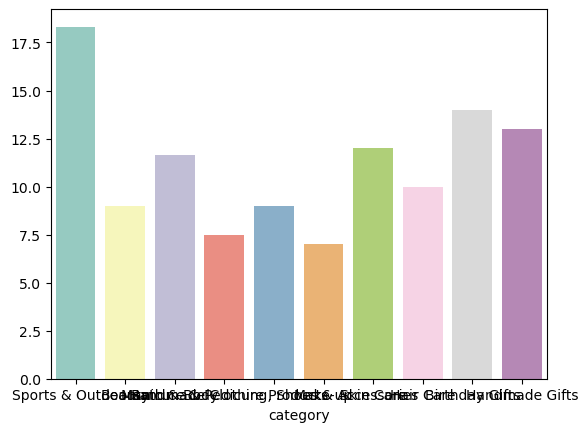

In [35]:
# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

category_counts = df_no_outliers['category'].value_counts()

top_categories = category_counts.head(10).index

top_average_prices = median_prices[top_categories]

sns.barplot(x=top_average_prices.index, y=top_average_prices.values, palette="Set3")

In [36]:
#Which product category commands the highest average price? Don't filter here by top categories.
mean_prices = df_no_outliers.groupby('category')['price'].mean()
highest_mean_category = mean_prices.idxmax()
highest_mean_price = mean_prices.max()
highest_mean_category

'Motherboards'

<Axes: xlabel='stars', ylabel='category'>

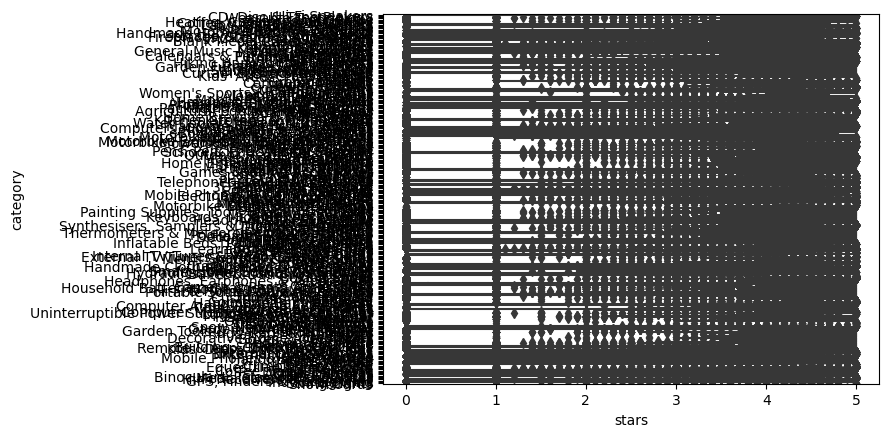

In [37]:
#Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
sns.boxplot(data=df_no_outliers, x='stars', y='category', palette="coolwarm")

<Axes: xlabel='stars', ylabel='category'>

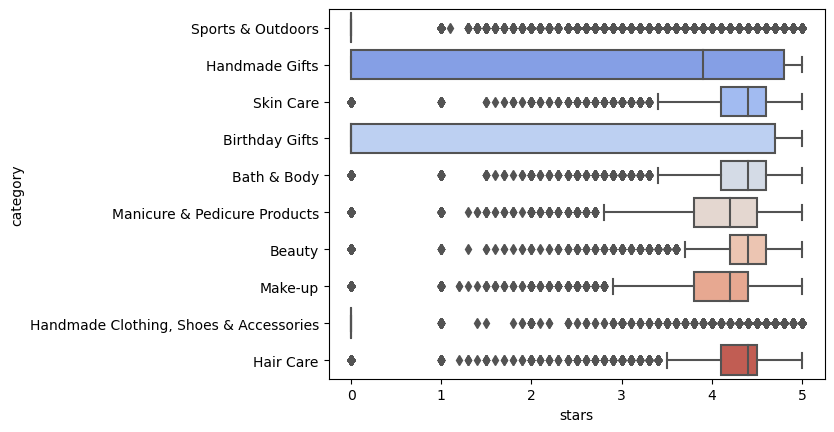

In [38]:
top_categories = df_no_outliers['category'].value_counts().nlargest(10).index

filtered_df = df_no_outliers[df_no_outliers['category'].isin(top_categories)]

sns.boxplot(data=filtered_df, x='stars', y='category', palette="coolwarm")

In [39]:
#Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
median_rating = filtered_df.groupby('category')['stars'].median()
highest_median_category = median_rating.idxmax()
highest_median_category

'Bath & Body'

In [41]:
#Calculate the correlation coefficient between price and stars.
correlation_1 = df['price'].corr(df['stars'])
correlation_1

-0.1249067326214861

In [42]:
correlation_2 = df['price'].corr(df['stars'], method='spearman')
correlation_2

-0.1331642546243379

In [ ]:
#Is there a significant correlation between product price and its rating?


<Axes: xlabel='stars', ylabel='price'>

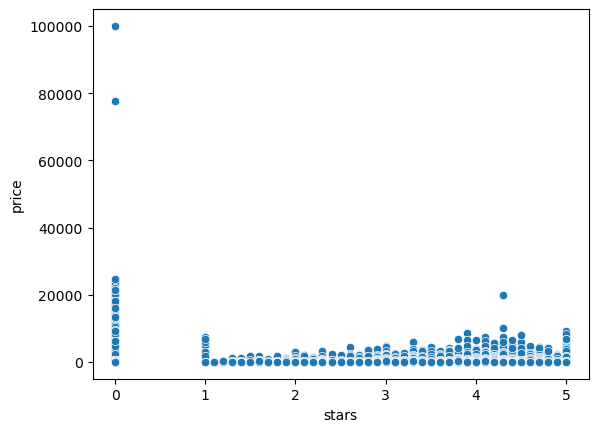

In [43]:
#Use a scatter plot to visualize the relationship between product rating and price
sns.scatterplot(data=df, x='stars', y='price')

In [47]:
#Use a correlation heatmap to visualize correlations between all numerical variables.
df_no_outliers_numeric = df_no_outliers.select_dtypes(include=['float64', 'int64'])

print("Numeric Columns:\n", df_no_outliers_numeric.columns)

Numeric Columns:
 Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')


<Axes: >

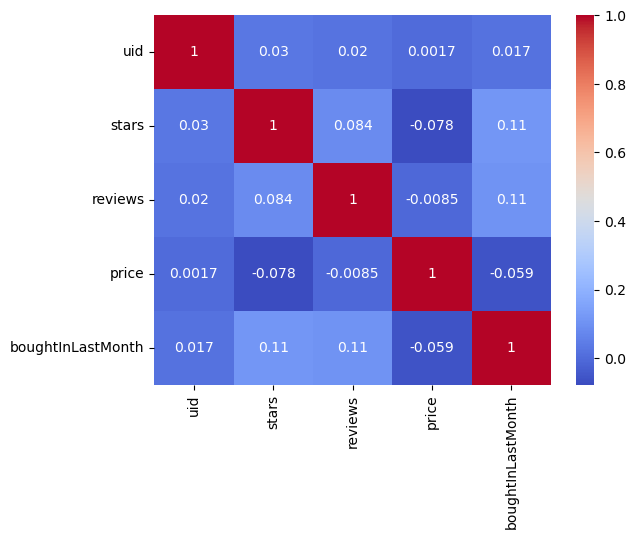

In [48]:
correlation_matrix = df_no_outliers_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

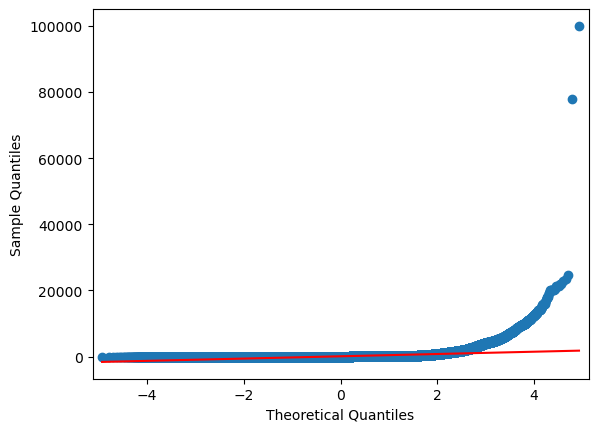

In [49]:
#Examine if product prices typically follow a normal distribution using a QQ plot.

import statsmodels.api as sm

sm.qqplot(df['price'], line='s');